In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Iris-Datensatz laden
iris = datasets.load_iris()
X = iris.data[:, :2]  # Wir nehmen nur zwei Merkmale für die Visualisierung
y = iris.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")  # Radial Basis Function (RBF) Kernel
svm_model.fit(X_train, y_train)


SVC()

In [6]:
y_pred = svm_model.predict(X_test)


In [7]:
# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy:.2f}")

# Konfusionsmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Konfusionsmatrix:\n", conf_matrix)

# Klassifikationsbericht
print("Klassifikationsbericht:\n", classification_report(y_test, y_pred))


Genauigkeit: 0.69
Konfusionsmatrix:
 [[15  0  0]
 [ 0  9  6]
 [ 0  8  7]]
Klassifikationsbericht:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.53      0.60      0.56        15
           2       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45



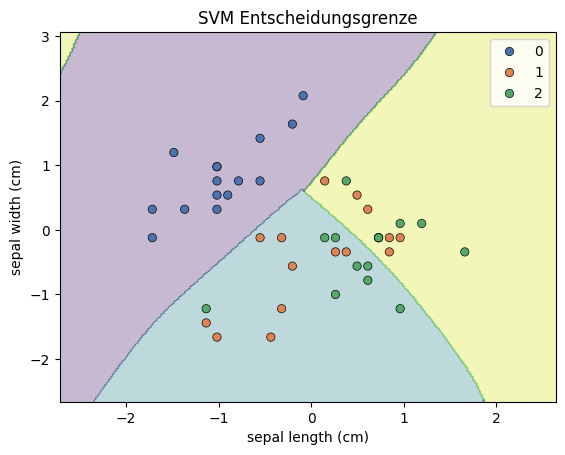

In [8]:
def plot_decision_boundary(model, X, y):
    h = .02  # Schrittweite des Mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="deep", edgecolor="k")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("SVM Entscheidungsgrenze")
    plt.show()

plot_decision_boundary(svm_model, X_test, y_test)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Stil für die Visualisierung
sns.set_style("whitegrid")


In [10]:
# Datensatz mit zwei kreisförmigen Klassen erstellen
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)

# Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalisieren der Daten für eine bessere Performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train, y_train)


SVC()

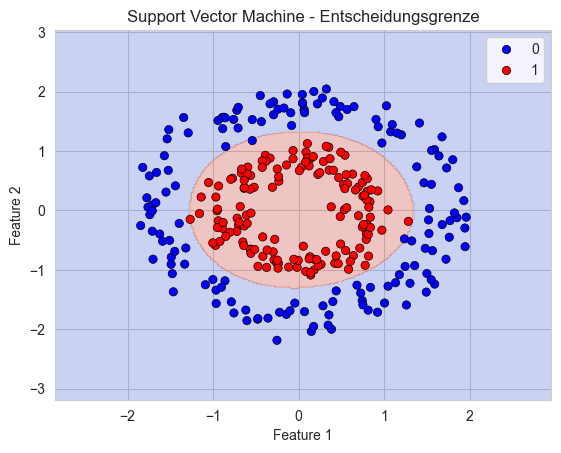

In [12]:
def plot_decision_boundary(model, X, y):
    h = 0.02  # Schrittweite des Mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: 'blue', 1: 'red'}, edgecolor="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Support Vector Machine - Entscheidungsgrenze")
    plt.show()

# Plot für das Testset
plot_decision_boundary(svm_model, X_test, y_test)


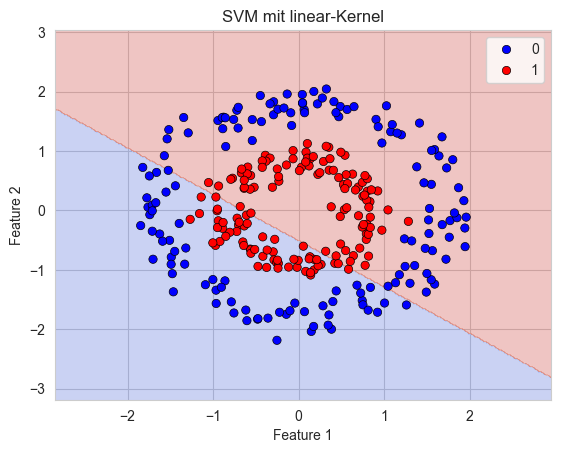

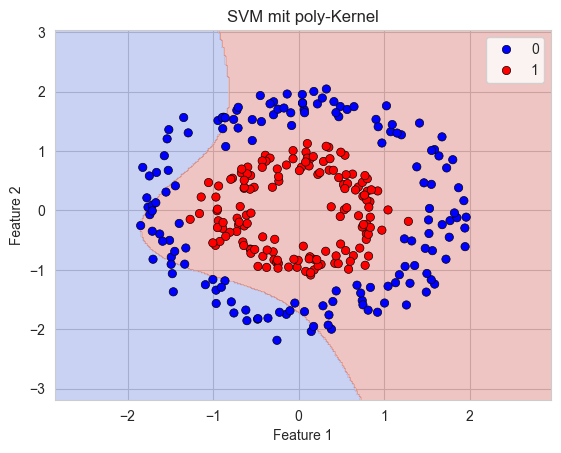

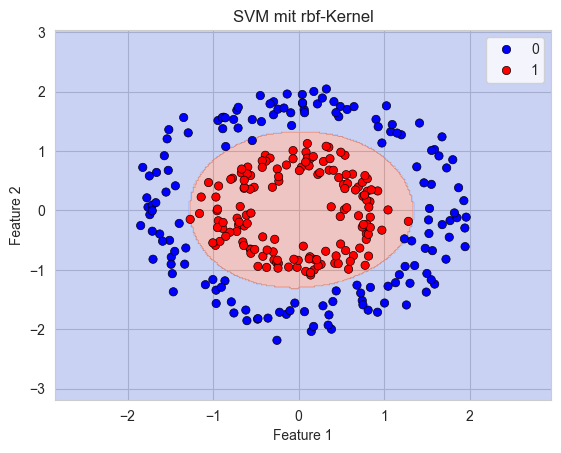

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Stil setzen
sns.set_style("whitegrid")

# Datensatz erstellen
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalisieren
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verschiedene Kernel testen
kernels = ["linear", "poly", "rbf"]
models = [SVC(kernel=k, C=1.0, gamma="scale", degree=3) for k in kernels]

# Trainieren der Modelle
for model in models:
    model.fit(X_train, y_train)

# Funktion zur Visualisierung der Entscheidungsgrenze
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: 'blue', 1: 'red'}, edgecolor="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

# Plots für verschiedene Kernel
for i, kernel in enumerate(kernels):
    plot_decision_boundary(models[i], X_test, y_test, f"SVM mit {kernel}-Kernel")


Beste Parameter: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Beste Genauigkeit: 1.0000


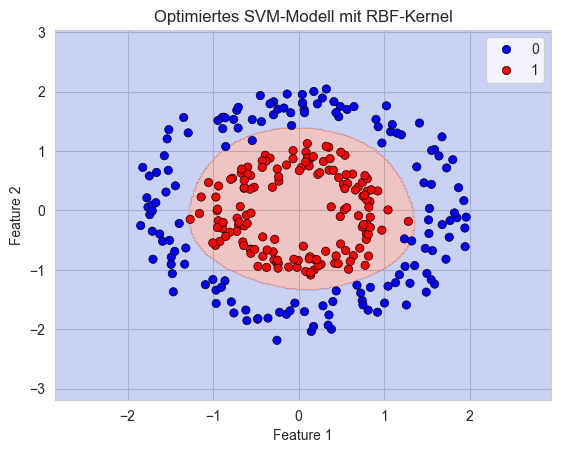

In [14]:
from sklearn.model_selection import GridSearchCV

# Parametergrid definieren
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
    "kernel": ["rbf"]
}

# GridSearch mit Cross-Validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Beste Parameter und Genauigkeit ausgeben
print(f"Beste Parameter: {grid_search.best_params_}")
print(f"Beste Genauigkeit: {grid_search.best_score_:.4f}")

# Bestes Modell trainieren und visualisieren
best_model = grid_search.best_estimator_
plot_decision_boundary(best_model, X_test, y_test, "Optimiertes SVM-Modell mit RBF-Kernel")
